In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


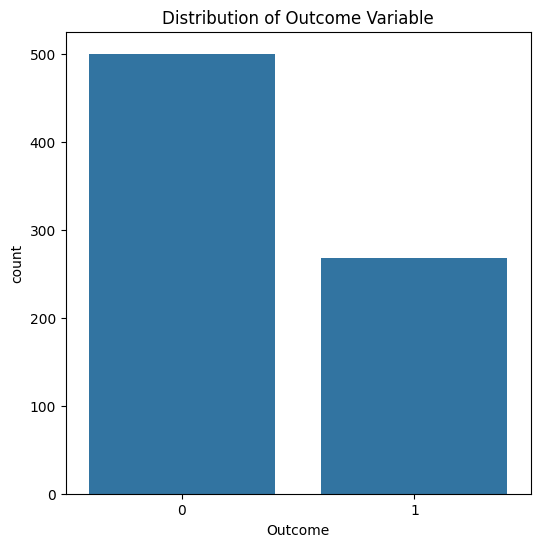

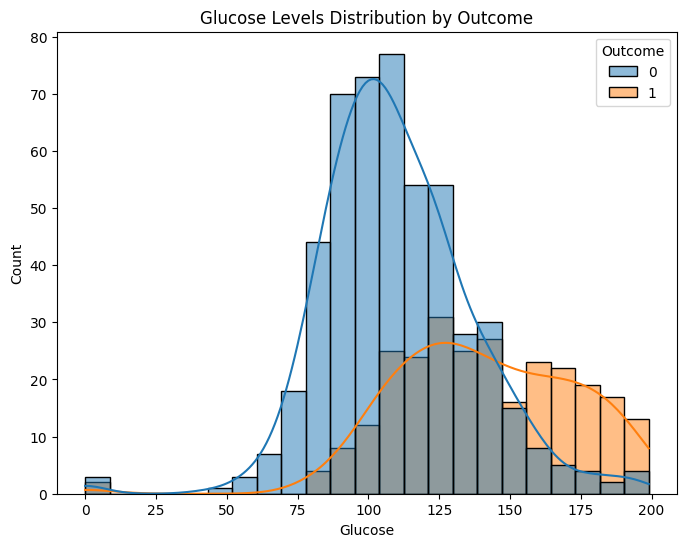

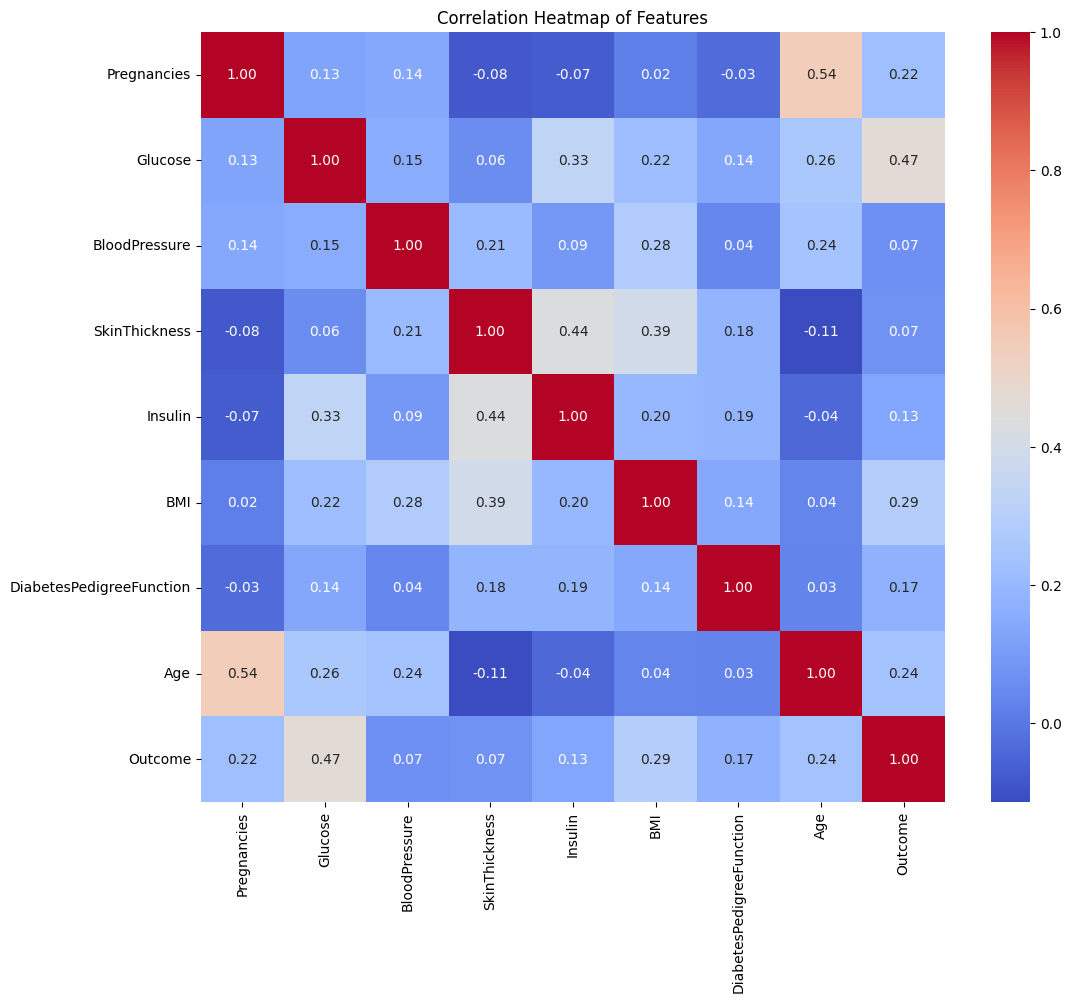

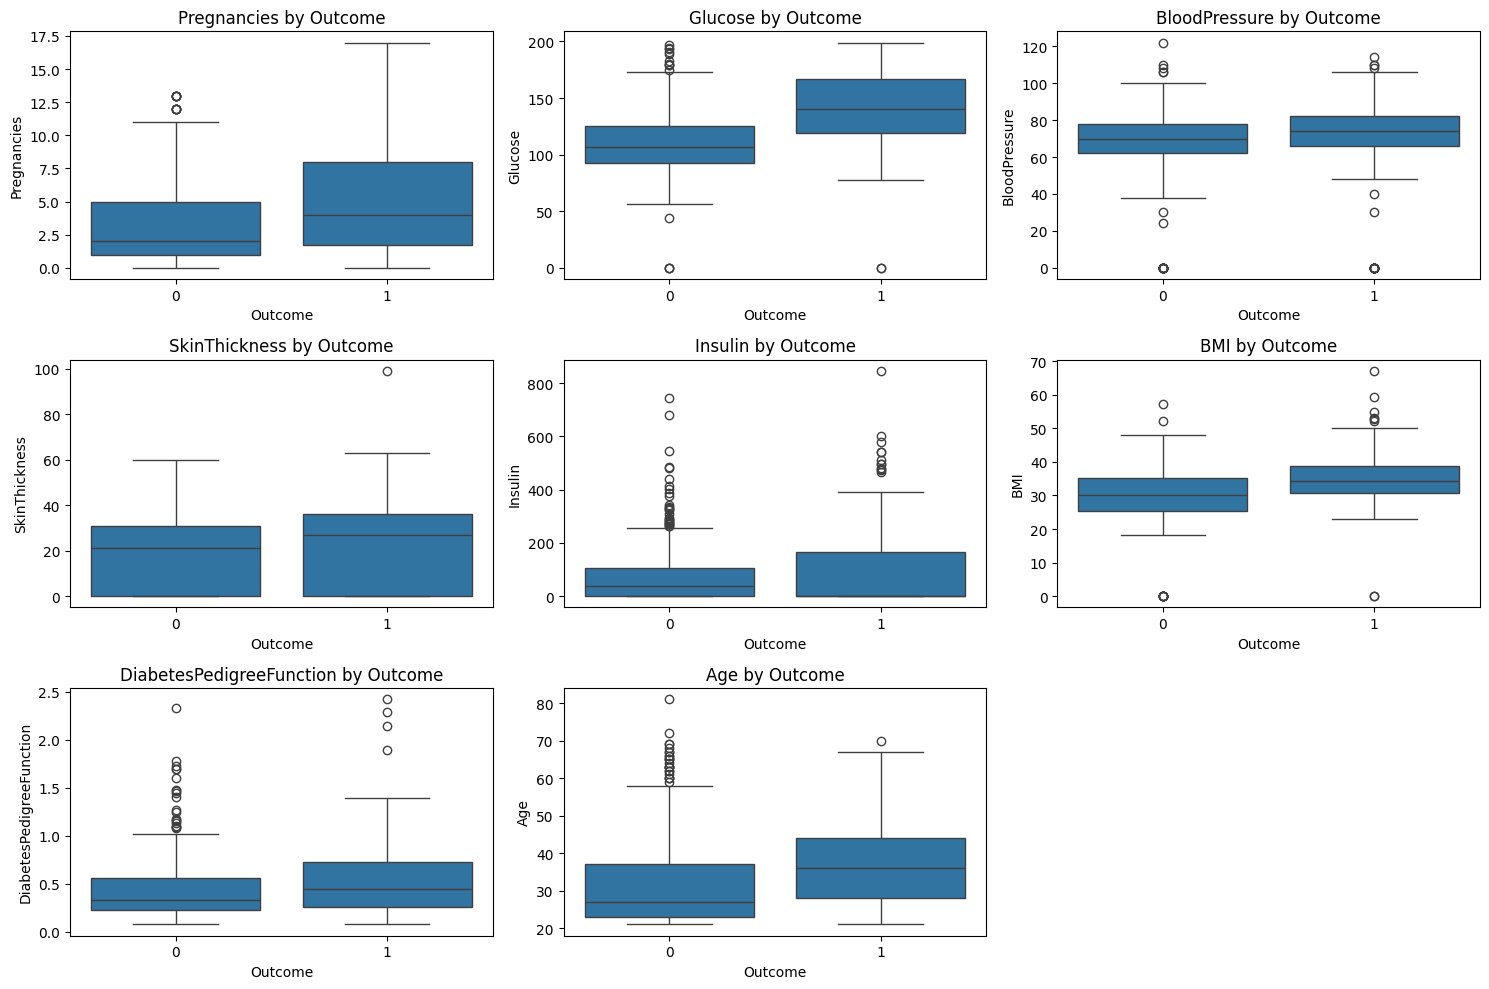

In [ ]:
# prompt: make data visualization

# Plotting the Outcome variable
plt.figure(figsize=(6,6))
sb.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.show()

# Plotting the distribution of Glucose levels for different outcomes
plt.figure(figsize=(8, 6))
sb.histplot(data=df, x="Glucose", hue="Outcome", kde=True)
plt.title('Glucose Levels Distribution by Outcome')
plt.show()

# Creating a correlation heatmap
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Creating box plots for numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sb.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

In [ ]:
target_name='Outcome'

y = df[target_name]

x = df.drop(target_name, axis=1)

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


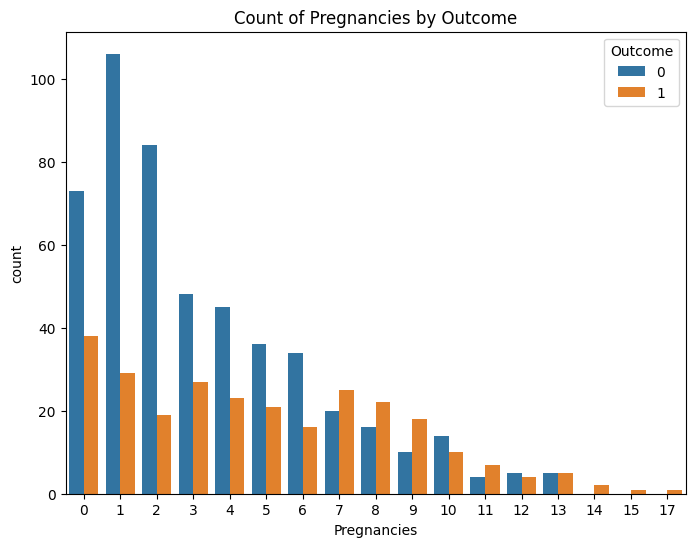

In [ ]:
# prompt: make a count plot

# Assuming 'df' is already loaded and processed as in the previous code

# Example using seaborn's countplot for 'Pregnancies'
plt.figure(figsize=(8, 6))
sb.countplot(x='Pregnancies', data=df, hue='Outcome')  # Use hue to distinguish by outcome
plt.title('Count of Pregnancies by Outcome')
plt.show()

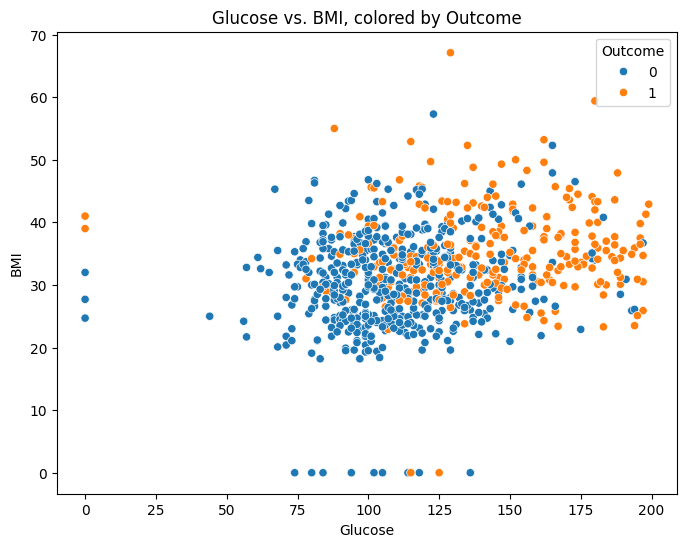

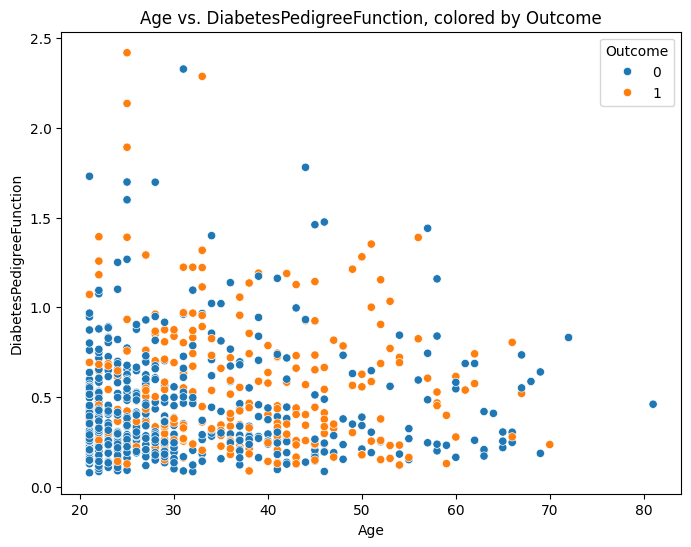

In [ ]:
# prompt: make a scalton plot for the dataset

# Assuming 'df' is already loaded and processed as in the previous code

# Example scatter plot: Glucose vs. BMI, colored by Outcome
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucose vs. BMI, colored by Outcome')
plt.show()


# Example scatter plot: Age vs. DiabetesPedigreeFunction
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Age', y='DiabetesPedigreeFunction', hue='Outcome', data=df)
plt.title('Age vs. DiabetesPedigreeFunction, colored by Outcome')
plt.show()

In [ ]:
# prompt: Train Test Split data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [ ]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [ ]:
# prompt: check test accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7467532467532467


In [ ]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(x_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(x_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  100.0
Test Accuracy score of Random Forest Algorithm  73.37662337662337


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(x_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(x_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  100.0
Test Accuracy score of Decision Tree Algorithm  74.67532467532467


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Train Accuracy of KNN Algorithm ", knn.score(x_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(x_test,y_test)*100)

Train Accuracy of KNN Algorithm  79.80456026058633
Test Accuracy score of KNN Algorithm  66.23376623376623
